# Networking for Big Data - Assigment #1
# Faranak Alikhah - Mehrdad Hassanzadeh - Behdad Ahmadi- Braulio Villalobos

#### Import Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## 1st Part 

#### Generation of ER Graphs

In [7]:
def er_graph_f(num_nodes, prob,show_graph = True):
    '''
    Creating the ER Graph by using the networkx library.
    num_nodes corresponds to the total number of nodes the ER graph contains.
    prob corresponds to the probability that each edge is included in the graph independently from every other edge.
    '''
    G= nx.erdos_renyi_graph(num_nodes,prob)
    
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

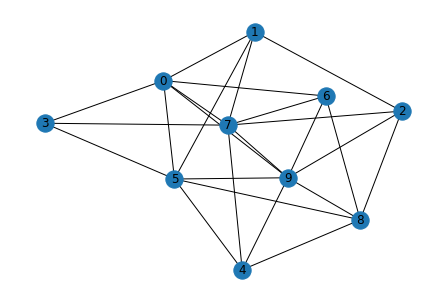

In [11]:
innn = er_graph_f(10,0.5)

#### Generation of r-regular random graph

In [26]:
def rr_graph_f(d,n,seed_par = None,show_graph=True):
    '''
    Creation of the Random Regular Graphs
    d corresponds to the degree of each node
    n corresponds to the number of nodes (n x d must ve even)
    seed corresponds to the indicator of the random number generation
    '''
    
    G = nx.random_regular_graph(d, n, seed=seed_par)
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

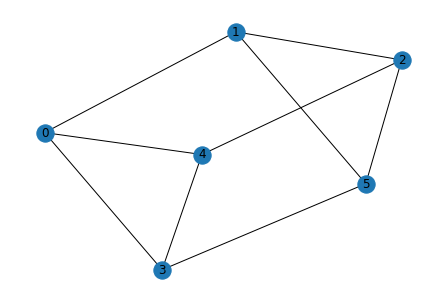

In [31]:
z = rr_graph_f(3, 6)